# Please read:

We have already defined the dataset below. 
And also have defined X_train and y_train. Please build a model and test it with X_test.


You should build a neural network model in Keras.

# Section A

In [1]:
from keras.datasets import mnist
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
(X_train, y_train), (X_test, y_test) = mnist.load_data()

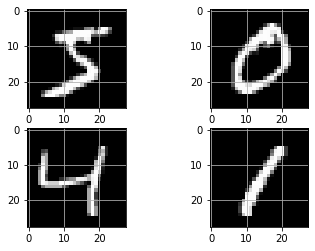

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.show()

In [3]:
# In the preceding code, we are importing the relevant Keras files and are also importing the MNIST dataset 
#(which is provided as a built-in dataset in Keras). 

# The MNIST dataset contains images of digits where the images are of 28 x 28 in shape. 
# You can see in the plots what they will look like.

# Section B - HW Neural Network starts here

In [4]:
# 1. Import the relevant packages and datasets

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical 
import random

In [6]:
#import 6000 images from mnist data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [8]:
#2. Preprocess the targets (convert them into one-hot encoded vectors) so that we can perform optimization on top of them:
#We shall be minimizing categorical cross entropy loss

#- 2points

In [9]:
# one hot encoding to convert the multiclass results to vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
# Each image has Intensity from 0 to 255
X_train = X_train/255 
X_test = X_test/255

In [11]:
# change the shape of the images to 1d array(28*28)
# for multipication 1*784
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)
print(X_train.shape)

(60000, 784)


In [12]:
#3. Initialize a model - 1 point

In [13]:
num_of_classes = 10
model = Sequential()
model.add(Dense(10, input_dim = num_pixels, activation = 'relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(num_of_classes, activation='sigmoid')) 

# Define the model architecture:
Specify the number of units in a hidden layer
Specify the activation function that is to be performed in a hidden layer
Specify the number of hidden layers
Specify the loss function that we want to minimize
Provide the optimizer that will minimize the loss function

In [14]:
#5. Fit the model 

In [15]:
model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 1s 5ms/step - loss: 0.5894 - accuracy: 0.7986 - val_loss: 0.2541 - val_accuracy: 0.9235
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2839 - accuracy: 0.9191 - val_loss: 0.2117 - val_accuracy: 0.9372
Epoch 3/10
270/270 [==============================] - 1s 5ms/step - loss: 0.2496 - accuracy: 0.9280 - val_loss: 0.1990 - val_accuracy: 0.9403
Epoch 4/10
270/270 [==============================] - 1s 5ms/step - loss: 0.2277 - accuracy: 0.9345 - val_loss: 0.1958 - val_accuracy: 0.9413
Epoch 5/10
270/270 [==============================] - 1s 5ms/step - loss: 0.2186 - accuracy: 0.9357 - val_loss: 0.1792 - val_accuracy: 0.9482
Epoch 6/10
270/270 [==============================] - 1s 5ms/step - loss: 0.2111 - accuracy: 0.9380 - val_loss: 0.1768 - val_accuracy: 0.9470
Epoch 7/10
270/270 [==============================] - 1s 5ms/step - loss: 0.1999 - accuracy: 0.9406 - val_loss: 0.1659 - val_accuracy: 0.9513
Epoch 

In [18]:
#6. Test the model

In [30]:
train_score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy:%.2f%%\n"%(score[1]*100))
test_score=model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:%.2f%%\n"%(test_score[1]*100))

Training Accuracy:95.00%

Testing Accuracy:94.17%



In [31]:
y_pred=model.predict(X_test)

In [32]:
y_pred

array([[2.9193870e-10, 7.3936894e-07, 1.1526438e-04, ..., 4.4249550e-01,
        1.9846853e-07, 1.1185441e-06],
       [5.7592820e-07, 3.1284793e-07, 2.9255748e-03, ..., 2.2185583e-08,
        1.5580833e-06, 7.2693862e-10],
       [3.4969474e-07, 7.3611408e-01, 5.8321325e-06, ..., 1.9580126e-04,
        7.5138487e-05, 2.2156385e-06],
       ...,
       [3.5047885e-06, 1.1283285e-07, 4.6213468e-06, ..., 2.1052361e-04,
        1.1374981e-05, 3.2779276e-03],
       [1.3414025e-04, 1.0417668e-08, 1.5863776e-04, ..., 7.9705114e-07,
        6.8715215e-04, 2.9790458e-06],
       [5.1619118e-09, 1.1910965e-13, 5.5525220e-08, ..., 2.1023051e-15,
        8.5743430e-09, 2.8944203e-10]], dtype=float32)

In [33]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [39]:
y_test_pred=np.argmax(y_pred,axis=1)

In [40]:
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [41]:
y_ori=np.argmax(y_test,axis=1)

In [42]:
y_ori

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [44]:
from sklearn.metrics import confusion_matrix
c_matrix=confusion_matrix(y_ori, y_test_pred)

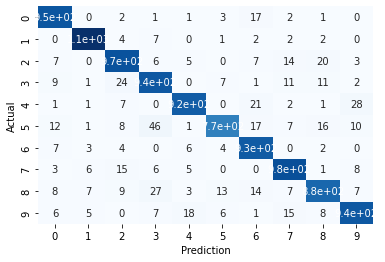

<Figure size 432x288 with 0 Axes>

In [47]:
import seaborn as sns
ax=sns.heatmap(c_matrix, annot=True, xticklabels=['0','1','2','3','4','5','6','7','8','9'],yticklabels=['0','1','2','3','4','5','6','7','8','9'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()
plt.clf()

Observation:
 - From the training and testing accuracy we can infer there is no overfitting or underfitting.
 - From confusion matrix we can say the model works great.

In [48]:
#7. Calculate the accuracy and loss values on top of the test dataset - 2 points

In [49]:
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

In [50]:
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 0.199
Test accuracy: 0.942


Observation:
 - As we know loss is negative log-likelihood for classification models, the loss should be low and we have 0.199 which is good.
 - Testing accuracy is 94.2 percentage.